In [5]:
import torch
import torch
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

BATCH_SIZE = 1

transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor(),
                                transforms.Normalize(0.5086, 0.2549)])
train_dataset = datasets.ImageFolder(root='train',
                                     transform=transform)
test_dataset = datasets.ImageFolder(root='validation',
                                    transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 4, 1)
        self.conv2 = nn.Conv2d(32, 64, 4, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(28224, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = f.relu(x)
        x = self.conv2(x)
        x = f.relu(x)
        x = f.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = f.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        out = f.log_softmax(x, dim=1)
        return out

In [6]:
# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load('logs/run2/modelv2.pt').to(device)

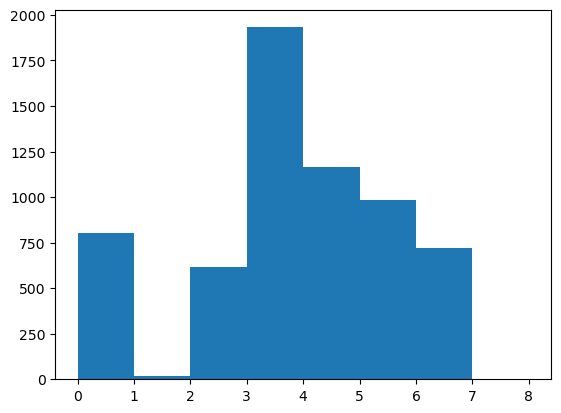

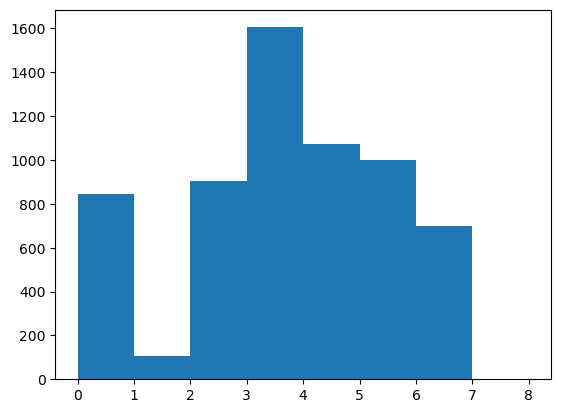

In [26]:
output_arr = []
target_arr = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True).cpu().flatten().numpy().item()
        output_arr.append(pred)
        #print(pred)
        label = target.cpu().flatten().numpy().item()
        target_arr.append(label)
plt.hist(output_arr, [0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()
plt.hist(target_arr, [0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()

In [20]:
new_arr = []
for i in range(len(output_arr)): 
    new_arr.append(output_arr[i].item())

In [ ]:
print(new_arr)

(array([ 803.,   17.,  614., 1932., 1167.,  983.,  718.,    0.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

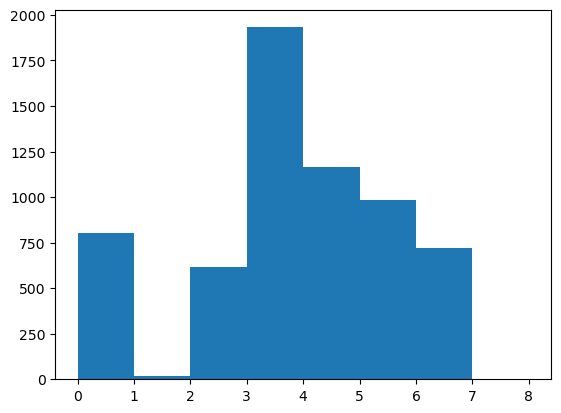

In [22]:
plt.hist(new_arr, [0, 1, 2, 3, 4, 5, 6, 7, 8])
